In [11]:
# step 1: importing libraries and data set
import pandas as pd # for dataframes
import numpy as np # for longer complicated calculations
from sklearn.feature_extraction.text import TfidfVectorizer # compute text into numerical vector
from sklearn.metrics.pairwise import cosine_similarity # compare how similar the two vectors are
import matplotlib.pyplot as plt # statistical visualisation
import seaborn as sns # graphs

In [10]:
data = pd.read_csv('/content/tcc_ceds_music.csv')  # uploading the data
data.head(5000) # printing the first 5000

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.000000
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.000000
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.000000
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.000000
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,14475,box car racer,elevator,2002,pop,build turn ignore concrete look break fall sun...,38,0.002024,0.002024,0.453750,...,0.159056,0.002024,0.550525,0.850447,0.054919,0.000203,0.873248,0.901899,world/life,0.257143
4996,14476,beck,guess i'm doing fine,2002,pop,blue window hear songs sing jewel heaven look ...,56,0.001120,0.001120,0.154613,...,0.379303,0.039242,0.403228,0.698100,0.147590,0.000123,0.227123,0.409391,sadness,0.257143
4997,14478,the flaming lips,ego tripping at the gates of hell,2002,pop,wait moment moment come billion moments slip a...,34,0.209752,0.001949,0.001949,...,0.382647,0.001949,0.571104,0.735918,0.033332,0.065587,0.855730,0.848844,sadness,0.257143
4998,14483,sum 41,no brains,2002,pop,step head dismay like beat dead time stop go h...,104,0.000634,0.472437,0.024415,...,0.000634,0.063726,0.428138,0.776171,0.000576,0.000014,0.689819,0.862859,violence,0.257143


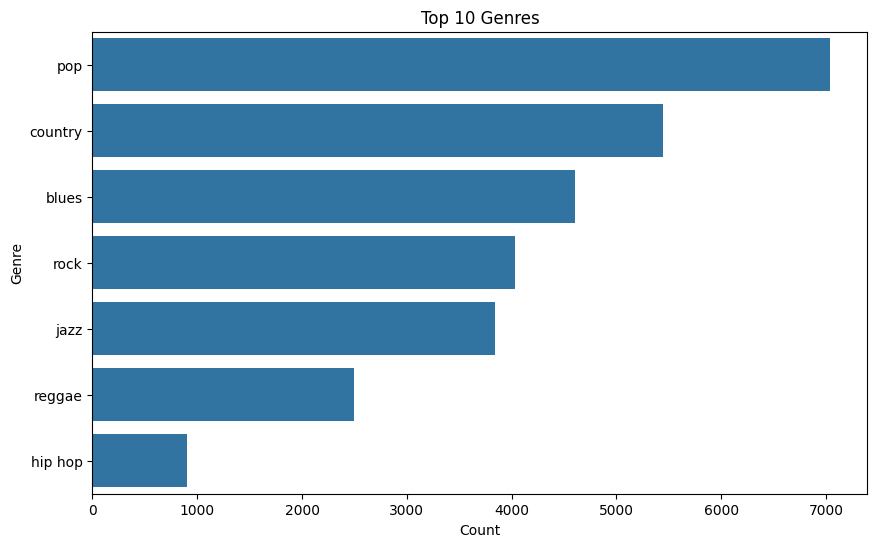

In [12]:
#step 2 Exploratory Data Analysis (EDA)
#visualizing the top 10 genres in the dataset to see the diversity of songs
plt.figure(figsize=(10, 6))
sns.countplot(y='genre', data=data, order=data['genre'].value_counts().index[:10])
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

/tmp/ipython-input-13-3365920122.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='pastel')


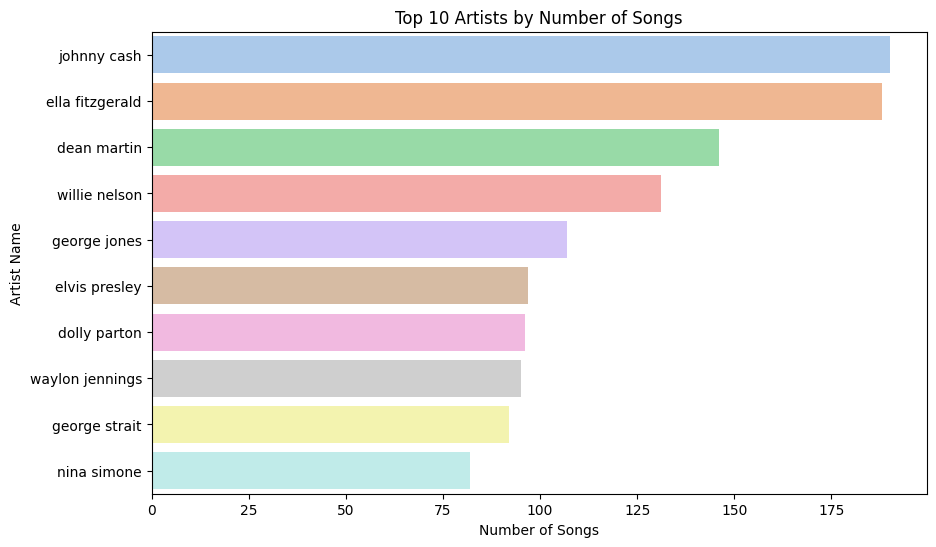

In [13]:
#identifying the most popular artist by the number of top songs they have in the dataset
top_artists = data.groupby('artist_name').size().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='pastel')
plt.title('Top 10 Artists by Number of Songs')
plt.xlabel('Number of Songs')
plt.ylabel('Artist Name')
plt.show()

In [14]:
# step 3: preprocessing the data
#concatenating the data into a single feature called combined feature
data['combined_features'] = (
    data['genre'].fillna('') + ' ' +
    data['artist_name'].fillna('') + ' ' +
    data['track_name'].fillna('')
)

In [15]:
#vectorizing text data
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['combined_features'])

In [7]:

#compute the cosine similarity between songs based on their vectorised features
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

def get_recommendations(song_title, data, cosine_sim, top_n=10):
    # Get the index of the song that matches the title
    idx = data[data['track_name'] == song_title].index
    if len(idx) == 0:
        print("Song not found in the dataset.")
        return

    idx = idx[0]

    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:top_n+1]
    song_indices = [i[0] for i in sim_scores]

    recommendations = data.iloc[song_indices]
    return recommendations

In [8]:
# step 4: generate recommendations
recommended_songs = get_recommendations('mohabbat bhi jhoothi', data, cosine_sim, top_n=10)
print(recommended_songs[['track_name', 'artist_name', 'genre']])

                      track_name artist_name genre
24    hum tujhse mohabbat kar ke      mukesh   pop
33      raat andheri door savera      mukesh   pop
2656             beyond and back           x   pop
2891                         9-9      r.e.m.   pop
2277                this is pop?         xtc   pop
4901                         pop      *nsync   pop
2241                 without you       heart   pop
2953             this is the day     the the   pop
6676                   pop style       drake   pop
5690           i like to move it   will.i.am   pop


/tmp/ipython-input-9-4028185294.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='track_name', x='artist_name', data=recommended_songs, palette='viridis')


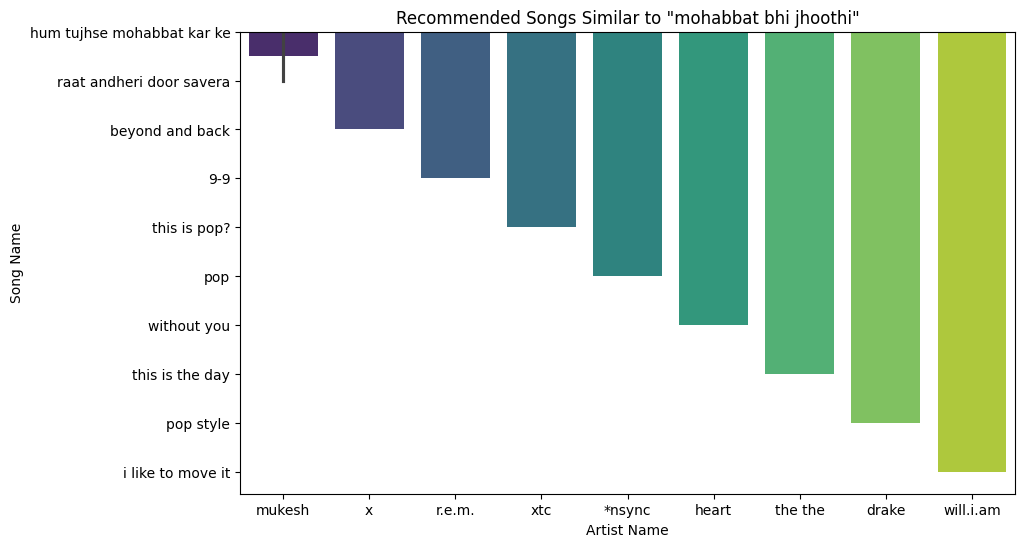

In [9]:
# step 5: visualize recommendations
plt.figure(figsize=(10, 6))
sns.barplot(y='track_name', x='artist_name', data=recommended_songs, palette='viridis')
plt.title('Recommended Songs Similar to "mohabbat bhi jhoothi"')
plt.xlabel('Artist Name')
plt.ylabel('Song Name')
plt.show()